### Normal distribution

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

data = pd.read_table("student-mat.csv",sep=";",header=0,)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [145]:
# G1에 대한 평균과 분산 구하기
mean = 0
var = 0
std = 0

for m in data["G1"]:
    mean += m

mean /= len(data)

for m in data["G1"]:
    var += (mean - m)**2

var /= len(data)

std = math.sqrt(var)

print(mean, var, std)

10.90886075949367 10.989161993270304 3.314990496708898


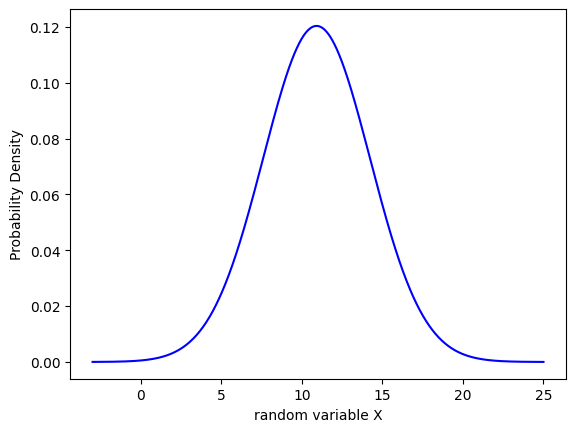

In [146]:
# normal distribution 설계 및 시각화
def normal_distribution(x, mean, std):
    return np.exp(-(x - mean)**2 / (2 * std**2)) / (std * math.sqrt(2 * math.pi))

x = np.linspace(-3, 25, 1000)
y = normal_distribution(x, mean, std)

plt.plot(x, y, color = 'blue')
plt.xlabel('random variable X')
plt.ylabel('Probability Density')
plt.show()

### Approximating normal with binomial

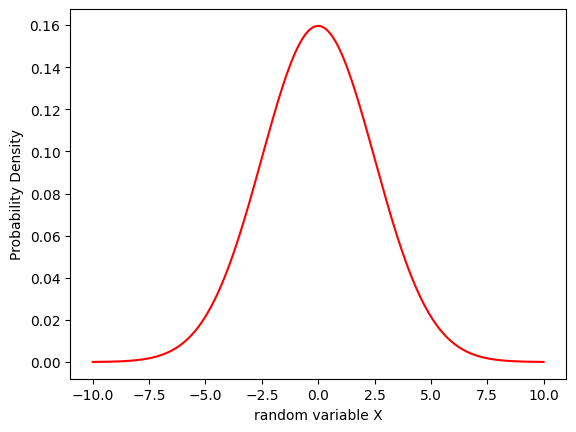

In [147]:
x = np.linspace(-10,10,1000)
mean = 0
std = 2.5
pdf = normal_distribution(x,mean,std)

plt.plot(x,pdf , color = 'red')
plt.xlabel('random variable X')
plt.ylabel('Probability Density')
plt.show()

In [148]:
import random

def next_action(p, step):
    if random.uniform(0, 1) < p:
        return 0
    else:
        return step

In [149]:
# 코드를 완성하시오. (변수 추가 및 수정 가능)

trial = 100_000 # 구슬 개수 (최대 100,000)
score = 1/trial 
step = 1 # 층당 이동 거리

p = 0.5
floor = 24 # 층 개수

li = [0] * (2 * floor + 1)
for _ in range(trial):
    curr = int(floor / 2)
    for _ in range(floor):
        curr += next_action(p, step)
    # print(curr)
    li[curr] += 1 / trial

print(len)
# print(li)

PMF_x = list(i for i in range(-floor, floor + 1)) # 값 채워서 반환
PMF_y = li

<built-in function len>


error:  0.014466353267687209


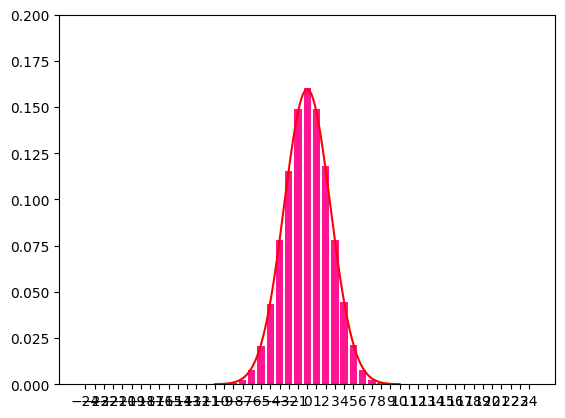

In [150]:
total_prob = sum(PMF_y)

def cal_error(result_x, result_y):
    error = 0
    for i in range(len(result_x)):
        error += abs(normal_distribution(result_x[i], mean, std)-result_y[i])
    print('error: ', error)

if abs(1-total_prob) > 0.0001 :
    print("확률의 총합이 1이 되지 않습니다")
else:
    cal_error(PMF_x, PMF_y)
    plt.bar(PMF_x, PMF_y, color='deeppink')
    plt.plot(x,pdf , color = 'red')
    plt.xticks(PMF_x)
    plt.ylim(min(PMF_y), 0.2)
    plt.show()

### 고찰
 - 현실세계에서 한번쯤 궁금했을 문제를 코딩으로 직접 구현해보니 뜻깊었다.
 - 가장 낮은 오차를 찾기 위해 여러번 시도해보았을 때 floor가 24일때 가장 낮은 값이 나왔다.
 - 1번은 어렵지 않게 구현하였다.